# House Price Prediction

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import sklearn as skl
import time
from __future__ import division
%matplotlib inline  

---

## Introduction

You will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
# reset data as pandas DataFrame
boston_df = DataFrame(bdata.data)

# label columns
boston_df.columns = bdata.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Set price column for target
boston_df['MEDV'] = bdata.target

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

### 1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


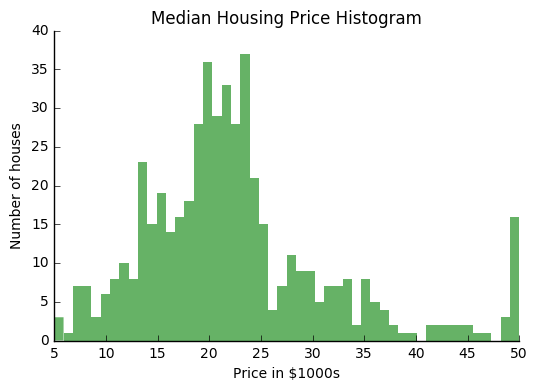

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.hist(boston_df["MEDV"],bins=50, color = "green", edgecolor = "none", alpha = 0.6)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')
plt.title('Median Housing Price Histogram')

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


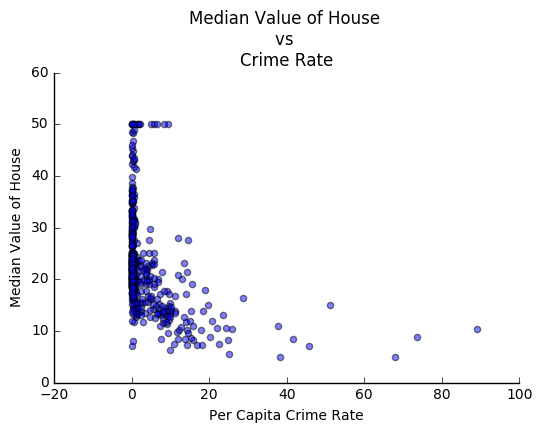

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.scatter(boston_df["CRIM"], boston_df["MEDV"], alpha = 0.5)

#label
plt.xlabel('Per Capita Crime Rate')
plt.ylabel('Median Value of House')
plt.title('Median Value of House \nvs \nCrime Rate')

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

In [8]:
#PLOT 1
corr_values_df = boston_df.corr()["MEDV"]

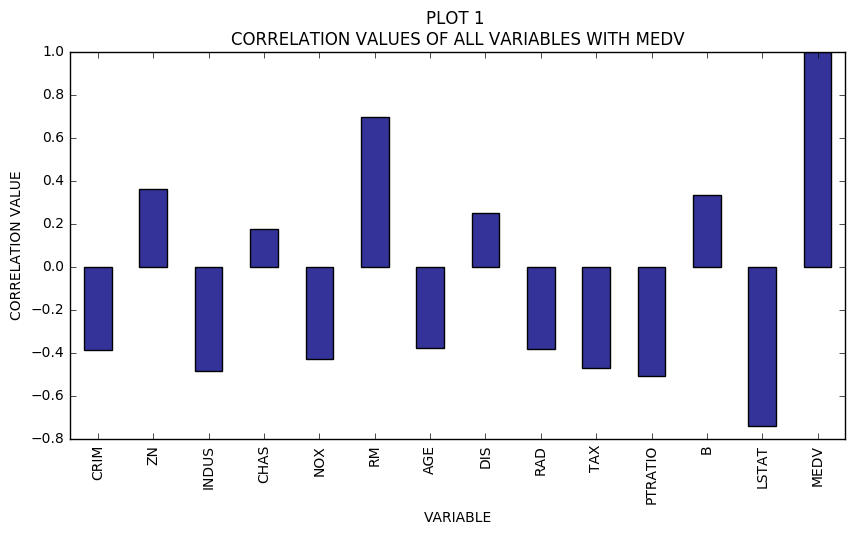

In [12]:
corr_values_df.transpose().plot(kind = "bar", colormap="terrain", figsize=(10,5), label=False)
plt.xlabel("VARIABLE")
plt.ylabel("CORRELATION VALUE")
plt.title("PLOT 1 \nCORRELATION VALUES OF ALL VARIABLES WITH MEDV")

* The plot gives the importance of each variable in the dataset. This has been calculated w.r.t the correlation values between the target "MEDV" and all other variables.

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [24]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6))
2.08
"""
def compute_rmse(prediction,yvalues):
    if len(np.array(prediction))==len(np.array(yvalues)):
        rmse = np.sqrt(np.mean((np.array(prediction)-np.array(yvalues))**2))
    else:
        print("array length not equal")
        return -1
    return rmse   

### 2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [25]:
# leave the following line untouched, 
#it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

#dividing into test and train
bdata_train = boston_df.sample(frac=0.66)
bdata_test = boston_df.loc[~boston_df.index.isin(bdata_train.index)]

In [26]:
#checking % split
len(bdata_train)/len(boston_df)

0.6600790513833992

In [27]:
#reindexing, as the test-train split chooses random indices
bdata_test.index = range(0,len(bdata_test))

In [28]:
#reindexing, as the test-train split chooses random indices
bdata_train.index = range(0,len(bdata_train))

### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [29]:
#checking mean of median value for training set
bdata_train["MEDV"].mean()

22.546407185628734

In [30]:
"""
Function
--------
bad_model

Given a dataframe, fit a model with a bad baseline (mean of the median value)

Parameters
----------
predictions : df
    a dataframe on which the model needs to be fitted

Returns
-------
bad_pred : list
    a list containing predictions pertaining to a bad model
    
"""
def bad_model(df):
    bad_pred=[]
    len1 = len(df)
    for i in range(0,len1):
        bad_pred.append(bdata_train["MEDV"].mean())
    
    return bad_pred

In [31]:
print "RMSE for the training set:"
print compute_rmse(bad_model(bdata_train),bdata_train.MEDV)


print "RMSE for the test set:"
print compute_rmse(bad_model(bdata_test),bdata_test.MEDV)

RMSE for the training set:
9.4276333999
RMSE for the test set:
8.70390794615


* The RMSE for the test set comes out to be greater than that of the training set. 
* I did not expect one value to be greater than the other. This is because we have a fixed model and then the observations in the train & test set have been randomly allocated. The RMSE is calculated on MEDV values which have been selected at random. So it is difficult to expect a certain type of result.

---

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [32]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    #converting x1, x2 into array & calculating L-norm distance
    d = abs(np.sum((np.array(x1)-np.array(x2))**L))**(1/L)

    return d

In [33]:
#checking the distance function
distance((3,4),(6,8),2)

5.0

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [34]:
"""
Function
--------
nneighbour

Given a test instances, a training set and a value for L, return the nearest neighbour, 
the input variables for distance function i.e. CRIM & RM have been hard coded

Parameters
----------
testinstance, train : dataframes
    dataframes that comprise of test and train model

L: int
    Value of L to use in computing distances

Returns
-------
train["MEDV][id] : int
    The value for MEDV for the nearest neighbour

"""

def nneighbor(testinstance, train, L): #testinstance : a single instance of test set, train:entire training set
    #declaring an empty array to store distance values
    z = []
    for j in range(0, len(train)):
        z.append(distance((testinstance["RM"], testinstance["CRIM"]),
                 (train["RM"][j], train["CRIM"][j]),
                 L))
        
    min_dist = min(z) #getting the least distance
    id = z.index(min_dist) #getting the index of the least distance

    return train["MEDV"][id] #return the nearest MEDV value from the training set

In [35]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor(bdata_test.loc[i],bdata_train,2))

print "Time taken to execute nneighbours: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours: 3.54 seconds
RMSE Value between training and test set: 6.98320660002


### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [36]:
"""
Function
--------
normalize

Given an array x1, return the normalized array

Parameters
----------
x1 : array
    Array of numerical values


Returns
-------
normalized x1: array
    Array with normalized values

"""
def normalize(x1):
    x1=np.array(x1) # converting into array
    for i in range(len(x1)):
        x1[i]=(x1[i]-x1.mean())/(np.std(x1)) #normalizing
    return x1

In [37]:
#Separately Normalizing the features CRIM & RM for train and test set
#Replacing the original values in the dataframe with the normalized values, as feature normalization is a good practice
bdata_test.RM = normalize(bdata_test.RM)
bdata_test.CRIM = normalize(bdata_test.CRIM)
bdata_train.RM = normalize(bdata_train.RM)
bdata_train.CRIM = normalize(bdata_train.CRIM)

/home/aamir/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor(bdata_test.loc[i],bdata_train,2))

print "Time taken to execute nneighbours for normalized feature values: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set for normalized feature values: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours for normalized feature values: 3.7 seconds
RMSE Value between training and test set for normalized feature values: 10.9495407146


* The RMSE before normalization is lesser than the RMSE value obtained after normalization.
* In the first run, the values before and after normalization came out to be 7.08 & 10.66.

### 3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [39]:
#Separately Normalizing the features AGE & TAX for train and test set
#Replacing the original values in the dataframe with the normalized values, as feature normalization is a good practice
bdata_test.AGE = normalize(bdata_test.AGE)
bdata_test.TAX = normalize(bdata_test.TAX)
bdata_train.AGE = normalize(bdata_train.AGE)
bdata_train.TAX = normalize(bdata_train.TAX)

In [40]:
"""
Function
--------
nneighbour2

Given a test instances, a training set and a value for L, return the nearest neighbour, 
the input variables for distance function i.e. AGE & TAX have been hard coded

Parameters
----------
testinstance, train : dataframes
    dataframes that comprise of test and train model

L: int
    Value of L to use in computing distances

Returns
-------
train["MEDV][id] : int
    The value for MEDV for the nearest neighbour

"""

#new Nneighbour for 2 variables
def nneighbor2(testinstance, train, L): #testinstance : a single instance of test set, train:entire training set
    #declaring an empty array to store distance values
    z = []
    for j in range(0, len(train)):
        z.append(distance((testinstance["AGE"], testinstance["TAX"]),
                 (train["AGE"][j], train["TAX"][j]),
                 L))
        
    min_dist = min(z) #getting the least distance
    id = z.index(min_dist) #getting the index of the least distance

    return train["MEDV"][id] #return the nearest MEDV value from the training set

In [41]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor2(bdata_test.loc[i],bdata_train,2))

print "Time taken to execute nneighbours for AGE & TAX for L = 2: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set for AGE & TAX as features and L = 2: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours for AGE & TAX for L = 2: 3.55 seconds
RMSE Value between training and test set for AGE & TAX as features and L = 2: 11.7480107173


In [42]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor2(bdata_test.loc[i],bdata_train,3))

print "Time taken to execute nneighbours for AGE & TAX for L = 3: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set for AGE & TAX as features and L = 3: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours for AGE & TAX for L = 3: 3.74 seconds
RMSE Value between training and test set for AGE & TAX as features and L = 3: 10.8322301168


In [43]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor2(bdata_test.loc[i],bdata_train,4))

print "Time taken to execute nneighbours for AGE & TAX for L = 4: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set for AGE & TAX as features and L = 4: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours for AGE & TAX for L = 4: 3.73 seconds
RMSE Value between training and test set for AGE & TAX as features and L = 4: 11.5195687904


In [44]:
#Separately Normalizing the features LSTAT & INDUS for train and test set
#Replacing the original values in the dataframe with the normalized values, as feature normalization is a good practice
bdata_test.LSTAT = normalize(bdata_test.LSTAT)
bdata_test.INDUS = normalize(bdata_test.INDUS)
bdata_train.LSTAT = normalize(bdata_train.LSTAT)
bdata_train.INDUS = normalize(bdata_train.INDUS)

In [45]:
"""
Function
--------
nneighbour4

Given a test instances, a training set and a value for L, return the nearest neighbour, 
the input variables for distance function i.e. RM, CRIM, LSTAT & INDUS have been hard coded

Parameters
----------
testinstance, train : dataframes
    dataframes that comprise of test and train model

L: int
    Value of L to use in computing distances

Returns
-------
train["MEDV][id] : int
    The value for MEDV for the nearest neighbour

"""
def nneighbor4(testinstance, train, L):
    
    z = []
    for j in range(0, len(train)):
        z.append(distance((testinstance["RM"], testinstance["CRIM"], testinstance["LSTAT"],testinstance["INDUS"]),
                 (train["RM"][j], train["CRIM"][j], train["LSTAT"][j], train["INDUS"][j]),
                 L))
        
    min_dist = min(z)
    id = z.index(min_dist)

    return train["MEDV"][id]

In [46]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor4(bdata_test.loc[i],bdata_train,2))

print "Time taken to execute nneighbours for RM, CRIM, LSTAT & INDUS for L = 2: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set for RM, CRIM, LSTAT & INDUS as features and L = 2: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours for RM, CRIM, LSTAT & INDUS for L = 2: 6.24 seconds
RMSE Value between training and test set for RM, CRIM, LSTAT & INDUS as features and L = 2: 6.78873468362


In [47]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor4(bdata_test.loc[i],bdata_train,3))

print "Time taken to execute nneighbours for RM, CRIM, LSTAT & INDUS for L = 3: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set for RM, CRIM, LSTAT & INDUS as features and L = 3: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours for RM, CRIM, LSTAT & INDUS for L = 3: 7.82 seconds
RMSE Value between training and test set for RM, CRIM, LSTAT & INDUS as features and L = 3: 8.29489546032


In [48]:
start_time = time.time()

pred_val = []
for i in range(len(bdata_test)): 
   pred_val.append(nneighbor4(bdata_test.loc[i],bdata_train,4))

print "Time taken to execute nneighbours for RM, CRIM, LSTAT & INDUS for L = 4: " + str(round(time.time() - start_time,2)) + " seconds"
print ("RMSE Value between training and test set for RM, CRIM, LSTAT & INDUS as features and L = 4: %s" %compute_rmse(pred_val,bdata_test["MEDV"]))

Time taken to execute nneighbours for RM, CRIM, LSTAT & INDUS for L = 4: 7.86 seconds
RMSE Value between training and test set for RM, CRIM, LSTAT & INDUS as features and L = 4: 6.89784681605


* Observations for model with 2 features(AGE & TAX) -
    * RMSE for L = 2 is 11.05 and time taken = 2.32
    * RMSE for L = 3 is 11.55 and time taken = 2.55
    * RMSE for L = 4 is 10.88 and time taken = 2.39

* Observations for model with 4 features(RM, CRIM, LSTAT & INDUS) -
    * RMSE for L = 2 is 6.58 and time taken = 3.93
    * RMSE for L = 3 is 7.44 and time taken = 4.10
    * RMSE for L = 4 is 6.88 and time taken = 4.08

* The RMSE value is lowest for L = 4 in 2 feature model and for L = 2 in 4 feature model. The running time is lowest for L = 2 in both models.

* Changing the value of L does affect the running time. It is lowest for L = 2 i.e. eudlidean distance calculation.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [49]:
# Resampling the entire dataset again
resample_boston_df = boston_df.sample(frac = 1)

#dividing the dataset into 10 parts (10 FOLD CROSS VALIDATION) 
sample_df = np.array_split(resample_boston_df, 10)

In [50]:
"""
Function
--------
crossvalidate

Given a dataframe, return the test & training sets 

Parameters
----------
df : dataframes
    dataframes that needs to be segregated into test and train

Returns
-------
train, test : list
    2 Lists for test and train, each containing equal number of test and train dataframes

"""
#declaring global arrays to store test and train data
test = []
train = []

#defining the function 
def crossvalidate(df):
    for k in range(len(df)):
        test.append(df[k]) #taking the kth subset into test
        train.append(df[:k] + df[(k+1):]) #taking everything apart from k into train
    for j in range(len(train)):
        train[j] = pd.DataFrame(pd.concat(train[j]))   #combining the train sets

In [51]:
crossvalidate(sample_df)

In [52]:
#reindexing the test and train portions -
for i in range(len(test)):
    test[i].index = range(0,len(test[i]))
    train[i].index = range(0,len(train[i]))

In [53]:
start = time.time()
total_rmse = 0
for j in range(len(test)): #selecting the jth test set
    predict = [] #declaring an empty list to store prediction values
    print "Iteration : %s" %j
    for i in range(len(test[j])): #selecting the observations from the jth subset
        start_time = time.time()
        predict.append(nneighbor(test[j].loc[i],train[j],2))
        
        
       
    print "RMSE for this iteration : %s" %compute_rmse(predict,test[j].MEDV)
    print "Time taken for this iteration : " + str(round(time.time() - start_time,2)) + " seconds"
    print "\n"
    total_rmse += compute_rmse(predict,test[j].MEDV)
    predict = []

print "\n"    
print "Average RMSE : %s" %(total_rmse/10)
print "Total Time taken: " + str(round(time.time() - start,2)) + " seconds"

Iteration : 0
RMSE for this iteration : 6.05047397268
Time taken for this iteration : 0.05 seconds


Iteration : 1
RMSE for this iteration : 7.27619001789
Time taken for this iteration : 0.03 seconds


Iteration : 2
RMSE for this iteration : 9.44834252505
Time taken for this iteration : 0.05 seconds


Iteration : 3
RMSE for this iteration : 6.30023342238
Time taken for this iteration : 0.05 seconds


Iteration : 4
RMSE for this iteration : 7.03691944633
Time taken for this iteration : 0.03 seconds


Iteration : 5
RMSE for this iteration : 6.01191627145
Time taken for this iteration : 0.04 seconds


Iteration : 6
RMSE for this iteration : 5.59000894454
Time taken for this iteration : 0.03 seconds


Iteration : 7
RMSE for this iteration : 9.04205728803
Time taken for this iteration : 0.04 seconds


Iteration : 8
RMSE for this iteration : 7.77745459646
Time taken for this iteration : 0.03 seconds


Iteration : 9
RMSE for this iteration : 5.4447038487
Time taken for this iteration : 0.04 s

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [54]:
"""
Function
--------
knn

Given a test instances, a training set, a value for L and a value for K, return the  K nearest neighbour, 
the input variables for distance function i.e. RM & CRIM have been hard coded

Parameters
----------
testinstance, train : dataframes
    dataframes that comprise of test and train model

L: int
    Value of L to use in computing distances
    
K: int
    no. of desired nearest neighbours

Returns
-------
The average MEDV value for the K nearest neighbours

"""

import time
def knn(testinstance, train, L, K):
    
    z = [] #declaring an empty array to store minimum distances
    for j in range(0, len(train)):
        z.append(distance((testinstance["RM"], testinstance["CRIM"]),
                 (train["RM"][j], train["CRIM"][j]),
                 L))
    
    z_sorted=z[:] #creating a copy of the distance array
    z_sorted=sorted(z_sorted) #sorting the copied array
    
    a = [] #declaring an empty array to store distances of K neighbours
    
    for i in range(K):
        a.append(z_sorted[i]) #appending the distances of the K nearest neighbours

    index=[] #declaring an empty array to store indices of K neighbours
    for j in range(len(a)):
        index.append(z.index(a[j])) #appending the indices of the K nearest neighbours
        
    sum_val = 0
    for h in range(len(index)):
        sum_val += train["MEDV"][h] #calculating the average medv values
    
    

    return sum_val/K # returning the value vased on K nearest neighbours

In [55]:
start_time = time.time()
total_rmse = 0
for j in range(len(test)):
    predict = []
    for i in range(len(test[j])):
       predict.append(knn(test[j].loc[i],train[j],2,3))
    total_rmse += compute_rmse(predict,test[j].MEDV)
    predict = []
print "Total RMSE for K = 3 : %s " %total_rmse
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

Total RMSE for K = 3 : 91.9744324713 
Time taken: 18.05 seconds


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [56]:
#Normalizing the feature values for test and train
for i in range(len(test)):
    test[i].ZN = normalize(test[i].ZN)
    test[i].AGE = normalize(test[i].AGE)
    test[i].DIS = normalize(test[i].DIS)
    test[i].TAX = normalize(test[i].TAX)
    test[i].CRIM = normalize(test[i].CRIM)
    test[i].RM = normalize(test[i].RM)
 
for j in range(len(train)):
    train[j].ZN = normalize(train[j].ZN)
    train[j].AGE = normalize(train[j].AGE)
    train[j].DIS = normalize(train[j].DIS)
    train[j].TAX = normalize(train[j].TAX)
    train[j].CRIM = normalize(train[j].CRIM)
    train[j].RM = normalize(train[j].RM)

In [57]:
"""
Function
--------
knn2

Given a test instances, a training set, a value for L and a value for K, return the  K nearest neighbour, 
the input variables for distance function i.e. RM, CRIM, AGE, DIS & TAX have been hard coded

Parameters
----------
testinstance, train : dataframes
    dataframes that comprise of test and train model

L: int
    Value of L to use in computing distances
    
K: int
    no. of desired nearest neighbours

Returns
-------
The average MEDV value for the K nearest neighbours

"""
def knn2(testinstance, train, L, K):
    
    z = [] #declaring an empty array to store minimum distances
    for j in range(0, len(train)):
        z.append(distance((testinstance["RM"],testinstance["CRIM"],
                           testinstance["AGE"], testinstance["DIS"], testinstance["TAX"]),
                          (train["RM"][j], train["CRIM"][j],train["AGE"][j], train["DIS"][j],
                           train["TAX"][j]),L))
    
    z_sorted=z[:] #creating a copy of the distance array
    z_sorted=sorted(z_sorted) #sorting the copied array
    
    a = [] #declaring an empty array to store distances of K neighbours
    
    for i in range(K):
        a.append(z_sorted[i]) #appending the distances of the K nearest neighbours

    index=[] #declaring an empty array to store indices of K neighbours
    for j in range(len(a)):
        index.append(z.index(a[j])) #appending the indices of the K nearest neighbours
        
    sum_val = 0
    for h in range(len(index)):
        sum_val += train["MEDV"][h] #calculating the average medv values
    
    

    return sum_val/K # returning the value vased on K nearest neighbours

In [58]:
"""
Function
--------
total_rms

Given a value of K, return the total rmse 

Parameters
----------
o : int
    value of K i.e. no. of nearest neighbours

Returns
-------
The total rms value for a given value of K

"""
def total_rms(o):
    total_rmse=0
    for j in range(len(test)):
        predict = []
        for i in range(len(test[j])):
            predict.append(knn2(test[j].loc[i],train[j],1,o))
        total_rmse += compute_rmse(predict,test[j].MEDV)
        predict = []
    return total_rmse

In [59]:
start_time = time.time()

#declaring an empty list to store total rmse values corresponding to each K
graph_values = []
for o in range(1,26):
    graph_values.append(total_rms(o))
    
print "Time taken: " + str(round(time.time() - start_time,2)/60) + " minutes"

Time taken: 12.1546666667 minutes


In [60]:
# arranging values of K from 1 to 25
K_value = np.arange(1,26)

#storing the RMSE values in a variable
RMSE = graph_values

#creating a dataframe
rmse_df = pd.DataFrame({'K-Value':K_value, 'RMSE':RMSE})

#reindexing
rmse_df.set_index(K_value, inplace=True)

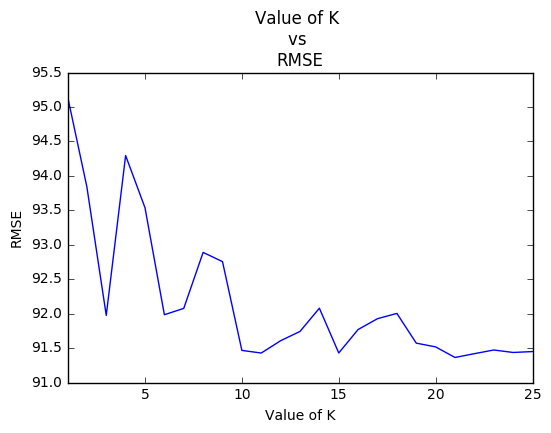

In [61]:
# plotting K value vs total rmse
rmse_df["RMSE"].plot()
plt.xlabel("Value of K")
plt.ylabel("RMSE")
plt.title("Value of K \nvs \nRMSE")

In [62]:
rmse_df.RMSE.min()

91.363285787484017

* We can observe the following from the plot -
    * The RMSE is shows a fluctuating trend for 1<K<7.
    * As the value of K increases to 4, we can see an increase in the RMSE value
    * As the value of K increases further, we can observe that the RMSE also increases until K = 7
    * When K is between 7 and 13, the RMSE value shows a decreasing behavior
    * For 13 < K < 25, the RMSE value tends to change very minutely. We can infer from the graph that the minimum RMSE occurs in this range.
    * Upon Examining the actual values, we see that RMSE is lowest at K = 13 with a value of 91.39